In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import classification_report
from termcolor import colored

Ucitavamo podatke:

In [2]:
data = pd.read_csv("/home/ivana/Desktop/IP-projekat/2023_Data_Mining_Smoking_Dataset/datasets/data1.csv")
data.columns

Index(['Unnamed: 0', 'gender', 'age', 'height(cm)', 'weight(kg)',
       'eyesight(left)', 'hearing(left)', 'hearing(right)', 'relaxation',
       'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL',
       'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'Gtp',
       'dental caries', 'tartar', 'smoking'],
      dtype='object')

In [3]:
data.drop('Unnamed: 0', axis=1,inplace=True)

In [4]:
data.shape

(55692, 20)

In [5]:
data.head()

,gender,age,height(cm),weight(kg),eyesight(left),hearing(left),hearing(right),relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,hemoglobin,Urine protein,serum creatinine,AST,Gtp,dental caries,tartar,smoking
0,0,40,155,60,1.2,1.0,1.0,73.0,94.0,215.0,82.0,73.0,12.9,1.0,0.7,18.0,27.0,0,1,0
1,0,40,160,60,0.8,1.0,1.0,70.0,130.0,192.0,115.0,42.0,12.7,1.0,0.6,22.0,18.0,0,1,0
2,1,55,170,60,0.8,1.0,1.0,86.0,89.0,242.0,182.0,55.0,15.8,1.0,1.0,21.0,22.0,0,0,1
3,1,40,165,70,1.5,1.0,1.0,60.0,96.0,322.0,254.0,45.0,14.7,1.0,1.0,19.0,18.0,0,1,0
4,0,40,155,60,1.0,1.0,1.0,74.0,80.0,184.0,74.0,62.0,12.5,1.0,0.6,16.0,22.0,0,0,0


Izdvajanje ciljnog atributa i podela na test i trening skup. 30% podataka cemo uzeti za test skup.

In [6]:
Y = data['smoking']
X = data.drop('smoking', axis=1)
feature_names = X.columns
X.head()

,gender,age,height(cm),weight(kg),eyesight(left),hearing(left),hearing(right),relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,hemoglobin,Urine protein,serum creatinine,AST,Gtp,dental caries,tartar
0,0,40,155,60,1.2,1.0,1.0,73.0,94.0,215.0,82.0,73.0,12.9,1.0,0.7,18.0,27.0,0,1
1,0,40,160,60,0.8,1.0,1.0,70.0,130.0,192.0,115.0,42.0,12.7,1.0,0.6,22.0,18.0,0,1
2,1,55,170,60,0.8,1.0,1.0,86.0,89.0,242.0,182.0,55.0,15.8,1.0,1.0,21.0,22.0,0,0
3,1,40,165,70,1.5,1.0,1.0,60.0,96.0,322.0,254.0,45.0,14.7,1.0,1.0,19.0,18.0,0,1
4,0,40,155,60,1.0,1.0,1.0,74.0,80.0,184.0,74.0,62.0,12.5,1.0,0.6,16.0,22.0,0,0


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, stratify=Y, random_state=12)

In [8]:
def report(model, x, y, text = "training"):
    y_pred = model.predict(x)
    
    print(colored("Izvestaj o klasifikaciji za model{} nad {} podacima".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report(y, y_pred))
    print("---------------------------------------------------------------------------------")
    
    print(colored("Matrica konfuzije za model {} nad {} podacima ".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns=['1', '0'], index=['1', '0']))
    print("---------------------------------------------------------------------------------")
    

In [9]:
def plot_decision_tree(model, feature_names):
    plt.figure(figsize=(20, 12))
    plot_tree(model, class_names=['1', '0'], feature_names=feature_names, filled=True)
    plt.title("Stablo odlucivanja dubine{} sa {} cvorova".format(model.get_depth(), model.get_n_leaves()))

    plt.show()
    print("---------------------------------------------------------------------------------")
    print(colored("Parametri modela {}".format(type(model).__name__), "green"))
    for k, v in model.get_params().items():
        print(colored(k, 'blue'), v)
    
    print("---------------------------------------------------------------------------------")


In [10]:
dtc = DecisionTreeClassifier(class_weight='balanced')

dtc.fit(X_train, Y_train) # treninranje modela

DecisionTreeClassifier(class_weight='balanced')

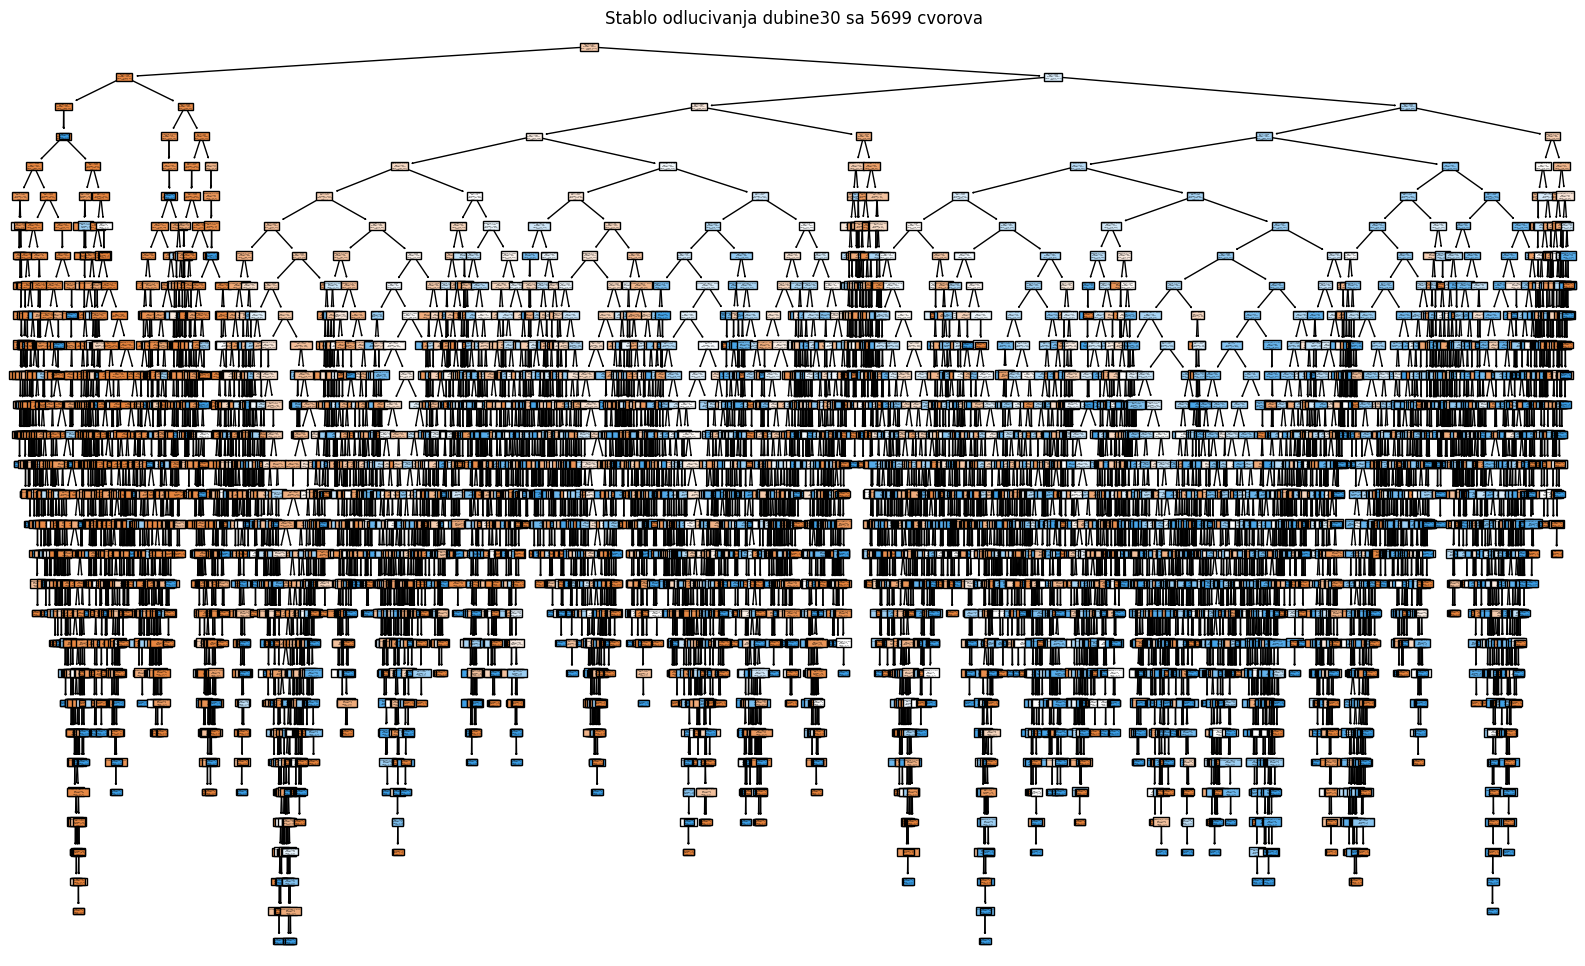

---------------------------------------------------------------------------------
Parametri modela DecisionTreeClassifier
ccp_alpha 0.0
class_weight None
criterion gini
max_depth None
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
random_state None
splitter best
---------------------------------------------------------------------------------


In [22]:
plot_decision_tree(dtc, feature_names)

Mozemo prikazati koji atributi su bili od najveceg znacaja prilikom formiranja stabla. 

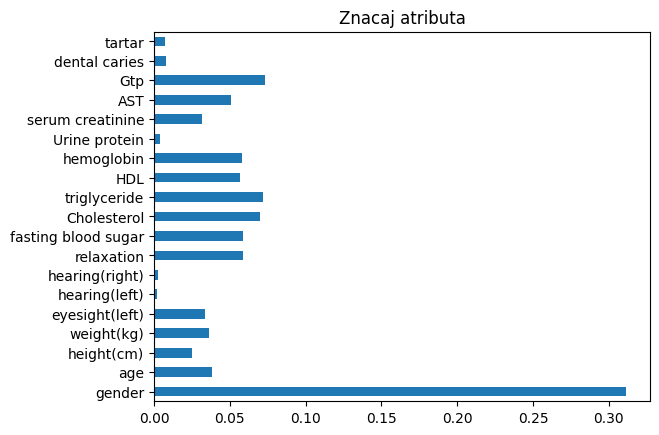

In [11]:
pd.Series(dtc.feature_importances_, index=X.columns).plot.barh()
plt.title("Znacaj atributa")
plt.show()

Vidimo da nam hearing(right) i hearing(left) imaju vrlo mali znacaj prilikom formiranja stabla. Odmah za njima je i atribut Urine proteine. Pol ima najveci uticaj, ali to je i ocekivano, jer smo na pocetku videli da medju zenama ima dosta manje pusaca.

In [12]:
report(dtc, X_train, Y_train)

Izvestaj o klasifikaciji za modelDecisionTreeClassifier nad training podacima
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24666
           1       1.00      1.00      1.00     14318

    accuracy                           1.00     38984
   macro avg       1.00      1.00      1.00     38984
weighted avg       1.00      1.00      1.00     38984

---------------------------------------------------------------------------------
Matrica konfuzije za model DecisionTreeClassifier nad training podacima 
---------------------------------------------------------------------------------
       1      0
1  24666      0
0      0  14318
---------------------------------------------------------------------------------


f1-score nam je 1. Mozemo zakljuciti da se model preprilagodio.

In [13]:
report(dtc, X_test, Y_test, "test")

Izvestaj o klasifikaciji za modelDecisionTreeClassifier nad test podacima
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.83      0.82     10571
           1       0.70      0.69      0.69      6137

    accuracy                           0.78     16708
   macro avg       0.76      0.76      0.76     16708
weighted avg       0.77      0.78      0.77     16708

---------------------------------------------------------------------------------
Matrica konfuzije za model DecisionTreeClassifier nad test podacima 
---------------------------------------------------------------------------------
      1     0
1  8752  1819
0  1933  4204
---------------------------------------------------------------------------------


Vidimo da je f1-score na test skupu 0.75.

# Podesavanje hiper-parametara

from sklearn.model_selection import GridSearchCV

params1 = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10, 12, 14]
}

params= {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 4, 5, 10, 20],
    'max_features': [10, 15, 20, 25, 30]
}

In [14]:
from sklearn.model_selection import GridSearchCV

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 15, 20, 25, 30, 35, 40, 45],
     'max_features': [10, 15, 20, 25, 30]
}


In [15]:
estimator = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), scoring='f1', param_grid= params,cv = 5)

In [16]:
estimator.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25, 30, 35, 40, 45],
                         'max_features': [10, 15, 20, 25, 30]},
             scoring='f1')

In [17]:
estimator.best_params_

{'criterion': 'gini', 'max_depth': 10, 'max_features': 15}

In [18]:
estimator.best_score_

0.7023921775363547

Vidimo da je najbolja kombinacija parametara gini i dubina 10, kao i da je najbolji score 0.7.

In [19]:
report(estimator.best_estimator_, X_train, Y_train)

Izvestaj o klasifikaciji za modelDecisionTreeClassifier nad training podacima
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.71      0.80     24666
           1       0.64      0.88      0.74     14318

    accuracy                           0.77     38984
   macro avg       0.78      0.80      0.77     38984
weighted avg       0.81      0.77      0.78     38984

---------------------------------------------------------------------------------
Matrica konfuzije za model DecisionTreeClassifier nad training podacima 
---------------------------------------------------------------------------------
       1      0
1  17603   7063
0   1718  12600
---------------------------------------------------------------------------------


In [20]:
report(estimator.best_estimator_, X_test, Y_test, "test")

Izvestaj o klasifikaciji za modelDecisionTreeClassifier nad test podacima
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.68      0.77     10571
           1       0.60      0.83      0.70      6137

    accuracy                           0.74     16708
   macro avg       0.74      0.76      0.73     16708
weighted avg       0.78      0.74      0.74     16708

---------------------------------------------------------------------------------
Matrica konfuzije za model DecisionTreeClassifier nad test podacima 
---------------------------------------------------------------------------------
      1     0
1  7212  3359
0  1018  5119
---------------------------------------------------------------------------------


Vidimo da je f1-score na trening skupu 71.5%, dok je na test skupu 71%.

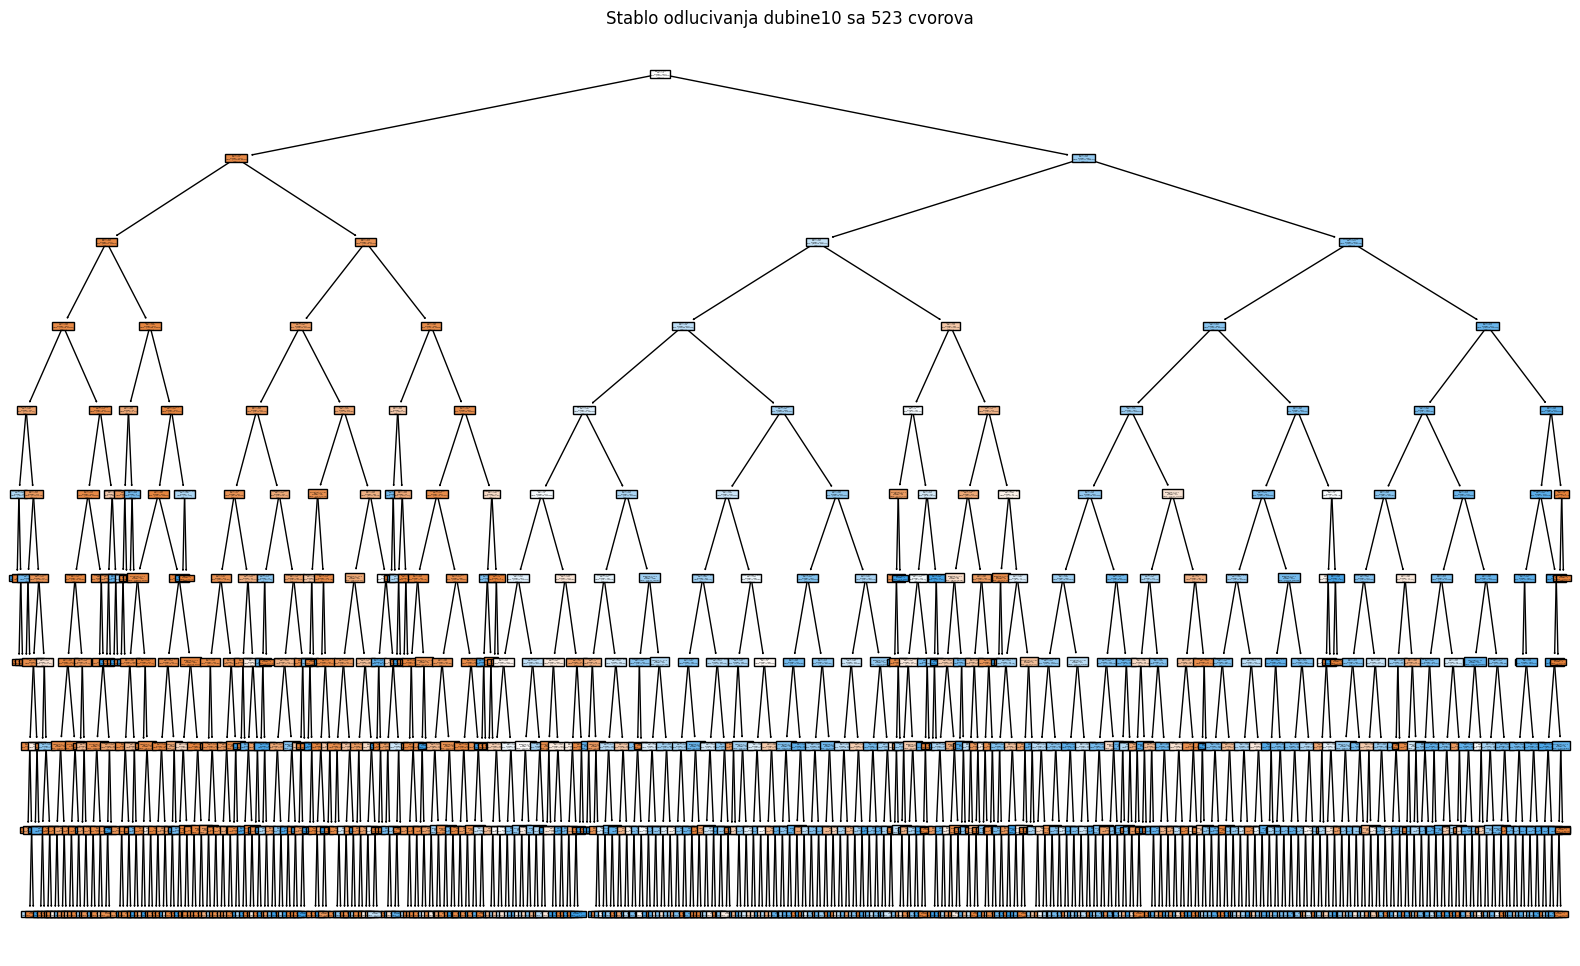

---------------------------------------------------------------------------------
Parametri modela DecisionTreeClassifier
ccp_alpha 0.0
class_weight balanced
criterion gini
max_depth 10
max_features 15
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
random_state None
splitter best
---------------------------------------------------------------------------------


In [43]:
plot_decision_tree(estimator.best_estimator_, feature_names)

Detaljni prikaz validacije:

In [44]:
estimator.cv_results_

{'mean_fit_time': array([0.09302855, 0.12988887, 0.17177372, 0.1646873 , 0.38170466,
        0.11688852, 0.16709356, 0.20792837, 0.20820413, 0.20762391,
        0.13422742, 0.19204655, 0.23966489, 0.23860044, 0.23856764,
        0.13781834, 0.19859118, 0.24959941, 0.24866533, 0.2490715 ,
        0.138837  , 0.20163751, 0.2505084 , 0.25071688, 0.25067711,
        0.13778915, 0.2028141 , 0.25095339, 0.251442  , 0.25172663,
        0.14052253, 0.20161481, 0.25141325, 0.25141578, 0.25297575,
        0.1408679 , 0.20105519, 0.25151911, 0.2531054 , 0.25026722,
        0.08564701, 0.1199337 , 0.14956822, 0.14988151, 0.1493216 ,
        0.11772389, 0.16667652, 0.20795159, 0.20790234, 0.20781083,
        0.13858285, 0.19487491, 0.24145904, 0.24170656, 0.24211316,
        0.14671669, 0.20647154, 0.25428538, 0.25503325, 0.25464096,
        0.14897013, 0.20777059, 0.26412039, 0.25887628, 0.25951161,
        0.14895182, 0.20887828, 0.26015925, 0.25694618, 0.25613041,
        0.15045209, 0.2066545 ,

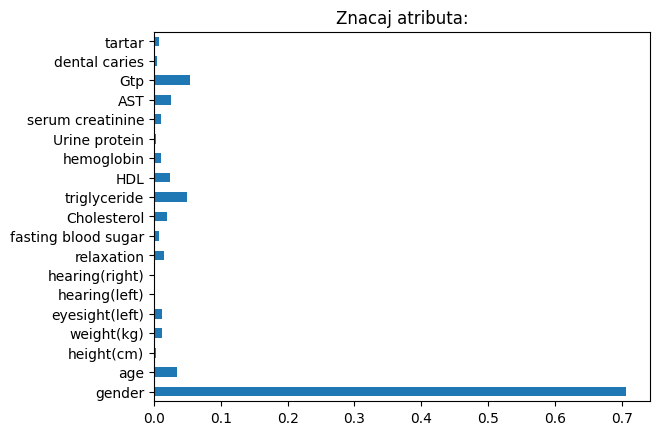

In [21]:
pd.Series(estimator.best_estimator_.feature_importances_, index=X.columns).plot.barh()
plt.title("Znacaj atributa:")
plt.show()

Kao sto mozemo da vidimo, ubedljivo najveci znacaj prilikom formiranja stabla imao je pol. Zatim Gtp, godine i trigleciridi.
Atributi hearing(right), hearing(left)i urine proteine nisu imali nikako uticaja. Zanemarljivo malo uticaja su imali i atributi height(cm), eyesight(left), eyesight(right) i relaxation.

Ocekivala sam da ce dental caries imati veci uticaj na klasifikaciju. :)


# Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

rfc_no_params = RandomForestClassifier(class_weight='balanced',random_state=0)
rfc_no_params.fit(X_train, Y_train)


RandomForestClassifier(class_weight='balanced', random_state=0)

In [24]:
report(rfc_no_params, X_test, Y_test, "trening")

Izvestaj o klasifikaciji za modelRandomForestClassifier nad trening podacima
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     10571
           1       0.76      0.76      0.76      6137

    accuracy                           0.82     16708
   macro avg       0.81      0.81      0.81     16708
weighted avg       0.82      0.82      0.82     16708

---------------------------------------------------------------------------------
Matrica konfuzije za model RandomForestClassifier nad trening podacima 
---------------------------------------------------------------------------------
      1     0
1  9064  1507
0  1444  4693
---------------------------------------------------------------------------------


In [25]:
report(rfc_no_params, X_test, Y_test, "test")

Izvestaj o klasifikaciji za modelRandomForestClassifier nad test podacima
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     10571
           1       0.76      0.76      0.76      6137

    accuracy                           0.82     16708
   macro avg       0.81      0.81      0.81     16708
weighted avg       0.82      0.82      0.82     16708

---------------------------------------------------------------------------------
Matrica konfuzije za model RandomForestClassifier nad test podacima 
---------------------------------------------------------------------------------
      1     0
1  9064  1507
0  1444  4693
---------------------------------------------------------------------------------


Vidimo da je f1-score i na trening i na test podacima 82%.

Podesavanje hiper-parametara:

In [26]:
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [300, 350, 400, 450, 500]
}

rfc_cv = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=0), param_grid=params, scoring='f1', cv=5)

In [27]:
rfc_cv.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=0),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [300, 350, 400, 450, 500]},
             scoring='f1')

In [28]:
rfc_cv.best_params_

{'criterion': 'entropy', 'n_estimators': 300}

In [29]:
rfc_cv.best_score_

0.7472262721795787

In [30]:
report(rfc_cv, X_test, Y_test, "trening")

Izvestaj o klasifikaciji za modelGridSearchCV nad trening podacima
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.85      0.86     10571
           1       0.75      0.79      0.77      6137

    accuracy                           0.83     16708
   macro avg       0.81      0.82      0.82     16708
weighted avg       0.83      0.83      0.83     16708

---------------------------------------------------------------------------------
Matrica konfuzije za model GridSearchCV nad trening podacima 
---------------------------------------------------------------------------------
      1     0
1  9007  1564
0  1319  4818
---------------------------------------------------------------------------------


In [31]:
report(rfc_cv, X_test, Y_test, "test")

Izvestaj o klasifikaciji za modelGridSearchCV nad test podacima
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.85      0.86     10571
           1       0.75      0.79      0.77      6137

    accuracy                           0.83     16708
   macro avg       0.81      0.82      0.82     16708
weighted avg       0.83      0.83      0.83     16708

---------------------------------------------------------------------------------
Matrica konfuzije za model GridSearchCV nad test podacima 
---------------------------------------------------------------------------------
      1     0
1  9007  1564
0  1319  4818
---------------------------------------------------------------------------------


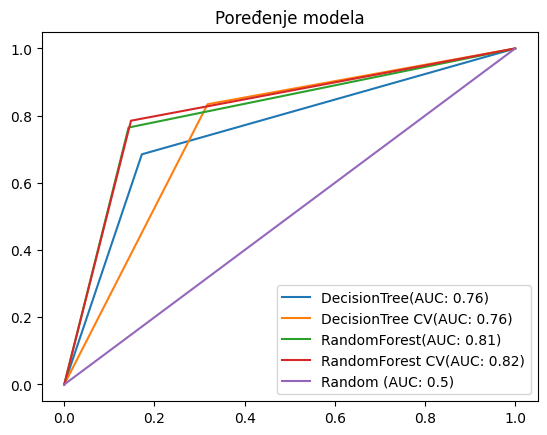

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

models = [dtc, estimator.best_estimator_, rfc_no_params, rfc_cv.best_estimator_]
model_names = ['DecisionTree', 'DecisionTree CV',  'RandomForest', 'RandomForest CV']

for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(Y_test, y_pred)
    auc = roc_auc_score(Y_test, y_pred)
    lab = model_name + "(AUC: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (AUC: 0.5)')
plt.title("Poređenje modela")
plt.legend()
plt.show()


Vidimo da je f1 score najbolji za RandomForest sa podesenim parametrima.

In [34]:
from joblib import dump
dump(models, 'stabla.joblib')

['stabla.joblib']